# Investigating Relationship Between GDP and Life-Expectancy
Analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship 

between the GDP and life expectancy of six countries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp

## Load Dataset

In [2]:
data = pd.read_csv('all_data.csv')

### First 5 Rows

In [3]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Distribution of Numeric Columns

In [4]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### Column Descriptions

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Analysis

### Number of Unique Countries

In [6]:
countries = data['Country'].unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Average GDP of The Six Countries

In [7]:
data.groupby('Country')['GDP'].mean()

Country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: GDP, dtype: float64

### Average Life Expectancy of the Six Countries

In [8]:
data.groupby('Country')['Life expectancy at birth (years)'].mean()

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64

### Max Life Expectancy of the Six Countries

In [9]:
data.groupby('Country')['Life expectancy at birth (years)'].max()

Country
Chile                       80.5
China                       76.1
Germany                     81.0
Mexico                      76.7
United States of America    79.3
Zimbabwe                    60.7
Name: Life expectancy at birth (years), dtype: float64

### Visualization of GDP as a function of Time

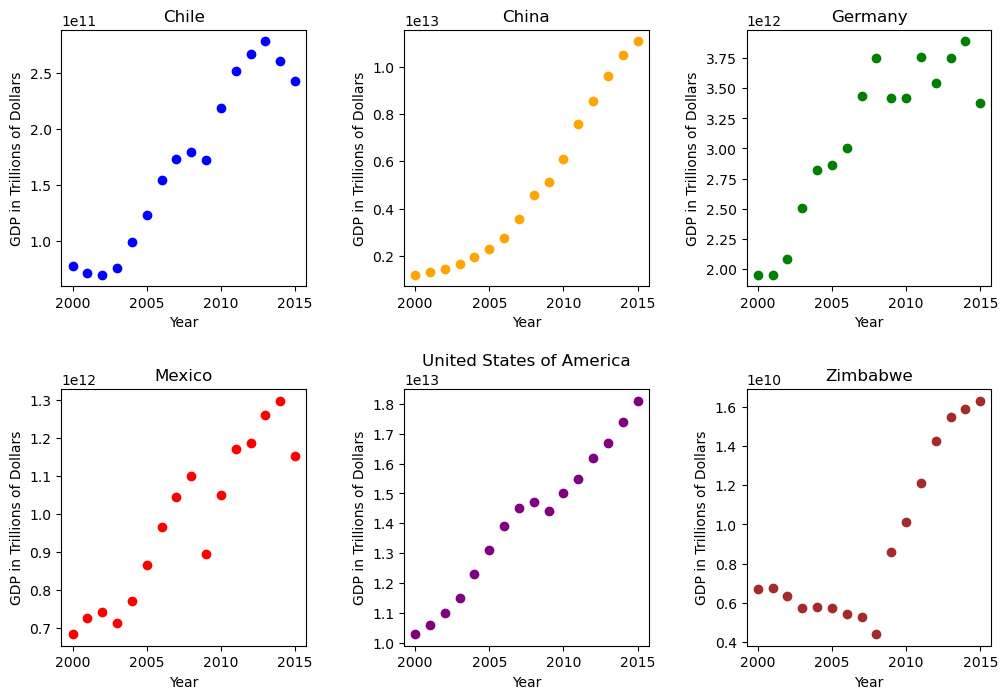

In [10]:
gdp_yrs_fig, axes = plt.subplots(2, 3, figsize=(12, 8))
gdp_yrs_fig.subplots_adjust(wspace=0.4, hspace=0.4)

colors = ['blue','orange','green','red','purple','brown']

for idx, options in enumerate(zip(countries, colors)):
    xvals = data[data['Country'] == options[0]]['Year']
    yvals = data[data['Country'] == options[0]]['GDP']

    gdp_yrs_fig.axes[idx].scatter(x=xvals, y=yvals, c=options[1])
    gdp_yrs_fig.axes[idx].set_title(options[0])
    gdp_yrs_fig.axes[idx].set_xlabel('Year')
    gdp_yrs_fig.axes[idx].set_ylabel('GDP in Trillions of Dollars')

### Visualization of GDP as a function of Life Expectancy

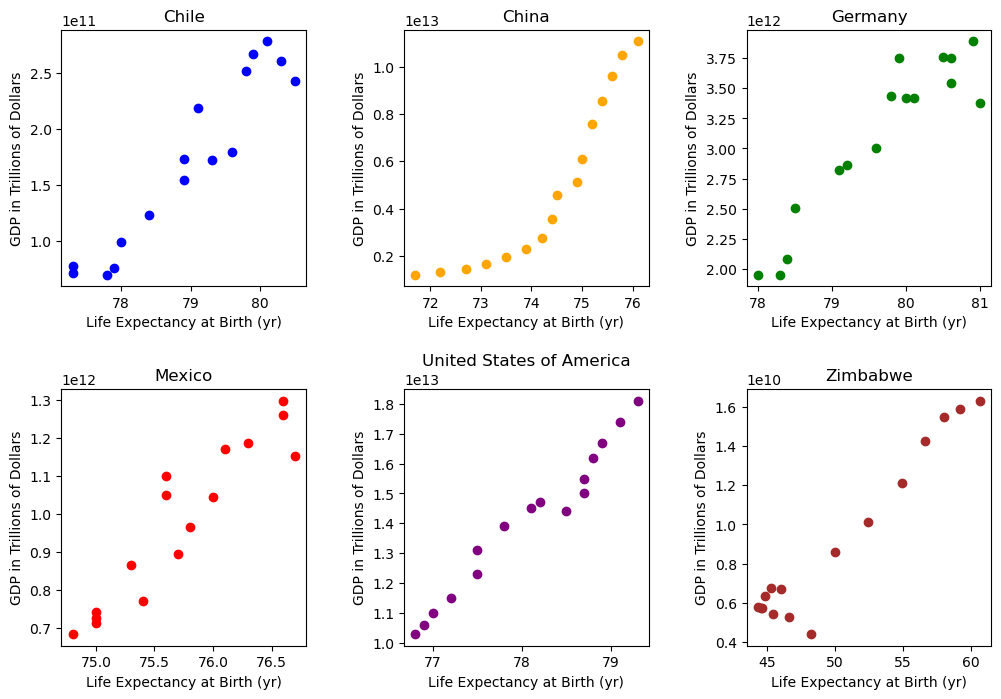

In [11]:
gdp_le_fig, axes = plt.subplots(2, 3, figsize=(12, 8))
gdp_le_fig.subplots_adjust(wspace=0.4, hspace=0.4)

colors = ['blue','orange','green','red','purple','brown']

for idx, options in enumerate(zip(countries,colors)):
    xvals = data[data['Country'] == options[0]]['Life expectancy at birth (years)']
    yvals = data[data['Country'] == options[0]]['GDP']

    gdp_le_fig.axes[idx].scatter(x=xvals, y=yvals, c=options[1])
    gdp_le_fig.axes[idx].set_title(options[0])
    gdp_le_fig.axes[idx].set_xlabel('Life Expectancy at Birth (yr)')
    gdp_le_fig.axes[idx].set_ylabel('GDP in Trillions of Dollars')

## Determining if aveage GDP from 1960 to 2025 is equal to the poplation mean

In [12]:
ttest_dict = {}

current_avg_gdp = {'United States of America':8.87e12, 'Chile': 0.09861e12, 'China':3.59e12, 
                   'Zimbabwe':0.01013e12, 'Mexico':0.55947e12, 'Germany':4.66e12}

for country in countries:
    ttest_dict[country] = ttest_1samp(data[data.Country == country]['GDP'], 
                                      popmean=current_avg_gdp[country], alternative='less')
    
for ttest in ttest_dict:
    print(f'{ttest} p-value: {ttest_dict[ttest].pvalue}')

Chile p-value: 0.9989379421898706
China p-value: 0.9305041833011194
Germany p-value: 5.7618298280950905e-08
Mexico p-value: 0.9999995438544353
United States of America p-value: 0.9999998142441706
Zimbabwe p-value: 0.16814959771347399


### Distribution of GDP Over Time in The Six Countries

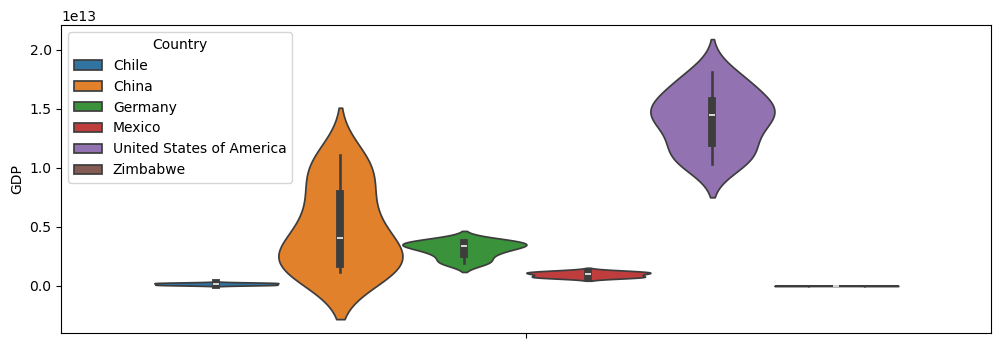

In [22]:
gdp_distribution_fig = plt.subplots(figsize=(12, 4))
distribution_ax = sb.violinplot(data=data, y='GDP', hue='Country')

## Conclusion

In this dataset there are avaibale six countries whose gross domestic product (GDP), life-expectancy at birth, and year of collected data.\
There are no missing values in this data. I assessed whether the mean of the population is less than that of the current mean GDP (from \
1960 to 2025). I found that only the GDP of Germany was less than that of current mean GDP. Chile, China, Mexico, U.S., and Zimbabwe were\
the countries whose population could not be said to be less than the current GDP. Germany had the highest maximum life expectancy at 81 yrs and \
Zimbabwe had the lowest, at 69 yrs. Additionally, the U.S. is shown to have the highest mean GDP both visually and numerically.